# TP 3 Theorie et Traitement de l'Information
## MGSI 4 - JAAFAR Leila

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns

## exercice 1

In [5]:
#1 chargement et affichage
titanic = pd.read_excel(r"C:\Users\leila\Downloads\titanic1.xlsx")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


*on a charge le dataset titanic1.xlsx et en utilisant la methode .head() on voit les 5 premieres lignes.*

In [7]:
#2 nombre de lignes et colonnes
num_rows = titanic.shape[0]
num_columns = titanic.shape[1]
print(f'le nombre des lignes: {num_rows} et des colonnes: {num_columns}')

# le nom des colonnes
titanic_columns = titanic.columns
print(f'le nom des colonnes est: {titanic_columns}')

le nombre des lignes: 1309 et des colonnes: 14
le nom des colonnes est: Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


*les methodes shape[0] et shape[1] nous renseignent sur le nombre des lignes et colonnes du dataset. Ensuite, titanic.columns nous envoie le nom de tous les colonnes.*

In [10]:
#3 les 4 premieres lignes
titanic.head(4) # ou bien titanic.iloc[:4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [11]:
# les 5 dernieres lignes
titanic.tail() # ou bien titanic.iloc[-5:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


*afin d'aboutir au but d'avoir les n premieres lignes ou les N dernieres lignes, on peut utiliser soit .head() et tail() respectivement, ou bien le iloc.*

In [17]:
#4 identifier les valeurs manquantes
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [19]:
#5 traitement des valeurs manquantes

# calcul de moyenne de chaque colonne numerique
def titanic_moyenne(column, numeric_only = True):
        return titanic[column].mean()
titanic_moyenne('age')

29.8811345124283

*on calcul la moyenne pour chaque colonne dans dataset titanic.*

In [22]:
# remplissage des valeurs manquantes
for column in titanic.columns:
    if titanic[column].dtype != object:
        titanic[column] = titanic[column].fillna(titanic_moyenne(column))  
    else:
        titanic[column] = titanic[column].fillna('non renseigné') 

*on remplace les valeurs numeriques par la moyenne, et les autres par non renseigne.*

In [25]:
titanic.isna().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

*maintenant, quand on execute la methode isna() une autre fois, on remarque qu'on a aucune valeur null.*

In [28]:
#6 parametres de dispersion et tendance centrale

#a age max, min et amplitude
titanic['age'].agg(['max', 'min', 'ptp'])

max    80.0000
min     0.1667
ptp    79.8333
Name: age, dtype: float64

In [30]:
#b moyenne d'age des passagers 
moyenne_age = titanic_moyenne('age')
print(f'la moyenne d\'age des passagers du titanic: {moyenne_age:.3f}')

la moyenne d'age des passagers du titanic: 29.881


In [32]:
#c mode et medianne de l'age
mode_age = titanic['age'].mode()
medianne_age = titanic['age'].median()
print(f'le mode d\'age des passagers du titanic {mode_age} et la medianne: {medianne_age}')

le mode d'age des passagers du titanic 0    29.881135
Name: age, dtype: float64 et la medianne: 29.8811345124283


*Attention! On remarque que le mode ~ medianne ~ medianne. Cela coincide avec le calcul de ces valeurs dans excel =AVERAGE(E2,E1310), etc. <br>
Pourquoi? le mode est la valeur la plus frequente et puisque on a remplace 263 NA valeurs par la moyenne donc ils sont egaux.*

In [35]:
#creation d'un subset de titanic contenant valeurs numeriques seulement
titanic_numeric = pd.DataFrame()
for column in titanic.columns:
    if titanic[column].dtype != object:
        titanic_numeric[column] = titanic[column]
titanic_numeric.head()

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,160.809917
1,1,1,0.9167,1,2,151.5500,160.809917
2,1,0,2.0000,1,2,151.5500,160.809917
3,1,0,30.0000,1,2,151.5500,135.000000
4,1,0,25.0000,1,2,151.5500,160.809917


In [37]:
#d variance et ecart type

titanic_variance = titanic_numeric.var()
titanic_ecarttype = titanic_numeric.std()
print(f'la variance = {titanic_variance} et l\'ecart type = {titanic_ecarttype}')

la variance = pclass         0.701969
survived       0.236250
age          165.976818
sibsp          1.085052
parch          0.749195
fare        2676.911604
body         875.659502
dtype: float64 et l'ecart type = pclass       0.837836
survived     0.486055
age         12.883199
sibsp        1.041658
parch        0.865560
fare        51.738879
body        29.591544
dtype: float64


*on remarque une correlation entre l'ecart type et la variance; puisque l'ecart type = sqrt(la variance). La variance represente a quel point les valeurs different elles de la moyenne et ainsi des autres valeurs. <br> Donc, on remarque une grande variance pour l'age et le prix du ticket.*

In [40]:
#e les quartiles
def titanic_quartiles():
    for column in titanic_numeric.columns:
        print(f'pour colonne: {column}')
        titanic_q1 = np.percentile(titanic_numeric[column], 25)
        titanic_q2 = np.percentile(titanic_numeric[column], 50)
        titanic_q3 = np.percentile(titanic_numeric[column], 75)
        print(f'q1: {titanic_q1}\n q2: {titanic_q2}\n q3: {titanic_q3}')
titanic_quartiles()

pour colonne: pclass
q1: 2.0
 q2: 3.0
 q3: 3.0
pour colonne: survived
q1: 0.0
 q2: 0.0
 q3: 1.0
pour colonne: age
q1: 22.0
 q2: 29.8811345124283
 q3: 35.0
pour colonne: sibsp
q1: 0.0
 q2: 0.0
 q3: 1.0
pour colonne: parch
q1: 0.0
 q2: 0.0
 q3: 0.0
pour colonne: fare
q1: 7.8958
 q2: 14.4542
 q3: 31.275
pour colonne: body
q1: 160.8099173553719
 q2: 160.8099173553719
 q3: 160.8099173553719


In [42]:
#f l'ensemble des deciles
def titanic_deciles():
    for column in titanic_numeric.columns:
        print(f'pour colonne: {column}')
        for i in range(10,110,10):
            titanic_decile = np.percentile(titanic_numeric[column], i)
            print(f'le {i}eme percentile : {titanic_decile}')
titanic_deciles()

pour colonne: pclass
le 10eme percentile : 1.0
le 20eme percentile : 1.0
le 30eme percentile : 2.0
le 40eme percentile : 2.0
le 50eme percentile : 3.0
le 60eme percentile : 3.0
le 70eme percentile : 3.0
le 80eme percentile : 3.0
le 90eme percentile : 3.0
le 100eme percentile : 3.0
pour colonne: survived
le 10eme percentile : 0.0
le 20eme percentile : 0.0
le 30eme percentile : 0.0
le 40eme percentile : 0.0
le 50eme percentile : 0.0
le 60eme percentile : 0.0
le 70eme percentile : 1.0
le 80eme percentile : 1.0
le 90eme percentile : 1.0
le 100eme percentile : 1.0
pour colonne: age
le 10eme percentile : 16.0
le 20eme percentile : 21.0
le 30eme percentile : 24.0
le 40eme percentile : 28.0
le 50eme percentile : 29.8811345124283
le 60eme percentile : 29.8811345124283
le 70eme percentile : 32.0
le 80eme percentile : 39.0
le 90eme percentile : 48.0
le 100eme percentile : 80.0
pour colonne: sibsp
le 10eme percentile : 0.0
le 20eme percentile : 0.0
le 30eme percentile : 0.0
le 40eme percentile : 0

In [44]:
titanic_moyenne('body')

160.8099173553719

*on peut s'assurer de ce calcul en voyant que le 100eme percentile correspond a la valeur max, ce qui est vrai pour notre dataset titanic. <br>
on voit aussi pour la colonne body que la moyenne domine, cela est du au fait que cette colonne avait le plus grand nombre des valeurs NA qu'on a remplace avec la moyenne. <br>
Ainsi, il est important de s'assurer de la logique de notre travail au fur et a mesure.*

In [47]:
#g parametres de dispersion et de tendance centrale
titanic_description = titanic_numeric.describe().T
titanic_description['variance'] = titanic_numeric.var()
titanic_description['mode'] = titanic_numeric.mode().iloc[0]
titanic_description['IQR'] = titanic_description['75%'] - titanic_description['25%']
for i in range(10, 100, 10):
    titanic_description[f"decile {i}"] = titanic_numeric.quantile(i/100)
titanic_description

,count,mean,std,min,25%,50%,75%,max,variance,mode,IQR,decile 10,decile 20,decile 30,decile 40,decile 50,decile 60,decile 70,decile 80,decile 90
pclass,1309.0,2.294882,0.837836,1.0000,2.000000,3.000000,3.000000,3.0000,0.701969,3.000000,1.0000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
survived,1309.0,0.381971,0.486055,0.0000,0.000000,0.000000,1.000000,1.0000,0.236250,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
age,1309.0,29.881135,12.883199,0.1667,22.000000,29.881135,35.000000,80.0000,165.976818,29.881135,13.0000,16.000000,21.000000,24.000000,28.000000,29.881135,29.881135,32.000000,39.000000,48.000000
sibsp,1309.0,0.498854,1.041658,0.0000,0.000000,0.000000,1.000000,8.0000,1.085052,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
parch,1309.0,0.385027,0.865560,0.0000,0.000000,0.000000,0.000000,9.0000,0.749195,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
fare,1309.0,33.295479,51.738879,0.0000,7.895800,14.454200,31.275000,512.3292,2676.911604,8.050000,23.3792,7.570000,7.854200,8.050000,10.500000,14.454200,21.679200,27.000000,41.579200,78.019980
body,1309.0,160.809917,29.591544,1.0000,160.809917,160.809917,160.809917,328.0000,875.659502,160.809917,0.0000,160.809917,160.809917,160.809917,160.809917,160.809917,160.809917,160.809917,160.809917,160.809917


*ainsi, on a une vue globale des parametres de dispersion et de tendance centrale. Premierement avec .describe() et ensuite en ajoutant les colonnes des valeurs manquantes.*

In [50]:
#7 nombre de personnes selon leurs sexes
titanic['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

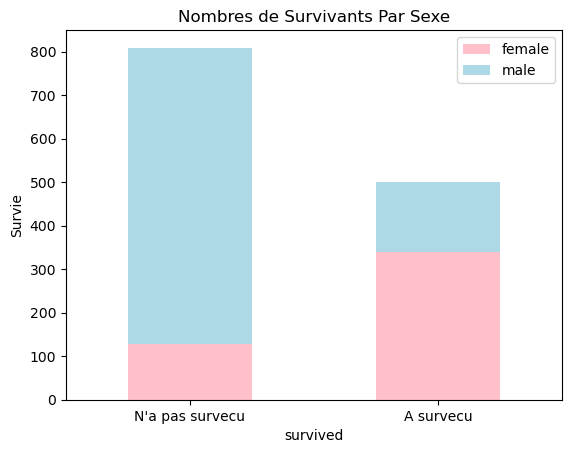

In [54]:
#8 representation graphique pour sex, survived
survived_sex = titanic.groupby(['survived', 'sex']).size().unstack()
survived_sex
survived_sex.plot.bar(stacked = True, color=['pink', 'lightblue'])
plt.title('Nombres de Survivants Par Sexe')
plt.ylabel('Survie')
plt.xticks(ticks = [0,1], labels=['N\'a pas survecu', 'A survecu'], rotation = 0)
plt.legend()
plt.show()

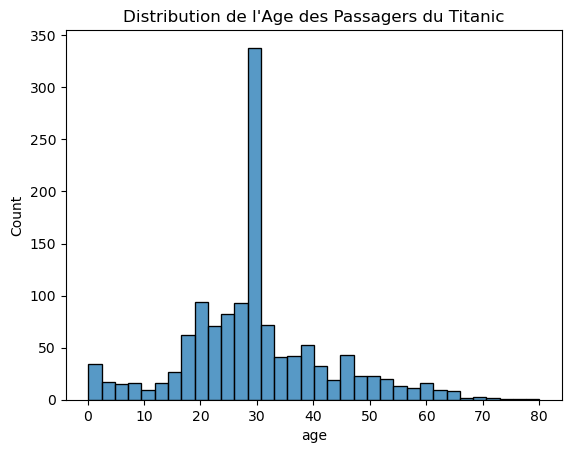

In [55]:
#9 representation graphique de l'age
sns.histplot(titanic['age'])
plt.title('Distribution de l\'Age des Passagers du Titanic')
plt.show()

Text(0.5, 1.0, "Boîte à moustache de l'âge")

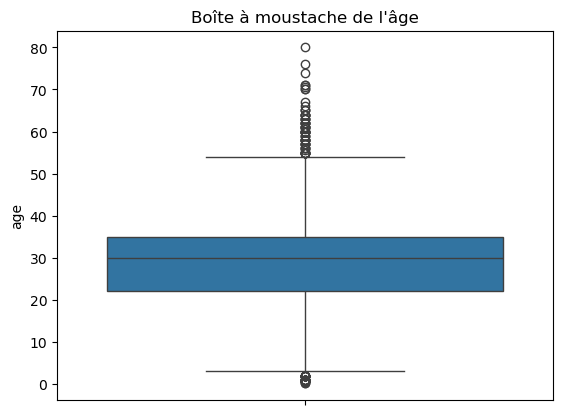

In [57]:
# box plot de l'age
sns.boxplot(titanic['age'])
plt.title("Boîte à moustache de l'âge")

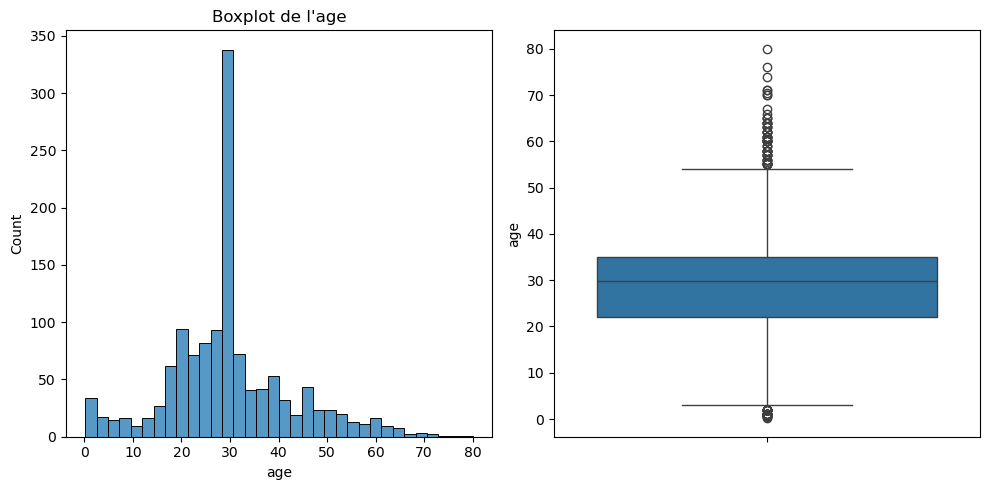

In [59]:
# groupement
f, axes = plt.subplots(1,2, figsize=(10,5))

sns.histplot(titanic['age'], ax=axes[0])
axes[0].set_title('Distribution de l\'age')

sns.boxplot(titanic['age'], ax=axes[1])
axes[0].set_title('Boxplot de l\'age')

plt.tight_layout()
plt.show()

In [66]:
#10 age moyen des survivants et decedes par sexe
moyenne_age_sexe = titanic.groupby(['survived', 'sex'])['age'].mean()
print(f'moyenne d\'age des survivants et decedes: {moyenne_age_sexe}')

moyenne d'age des survivants et decedes: survived  sex   
0         female    26.384371
          male      31.135167
1         female    29.824474
          male      27.446643
Name: age, dtype: float64


In [68]:
#11 description classe tarifaire des passagers
print(titanic['pclass'].value_counts())

pclass
3    709
1    323
2    277
Name: count, dtype: int64


In [106]:
#12 relation entre classe et taux de survie 
taux_survie = titanic.groupby('pclass')['survived'].mean()*100
print(f'{taux_survie}')

pclass
1    61.919505
2    42.960289
3    25.528914
Name: survived, dtype: float64


*on remarque que la classe la plus luxueuse contient le plus grand nombre des passagers qui ont survecu.*

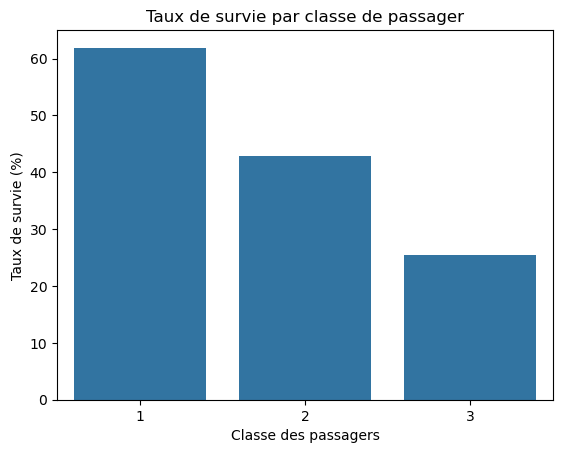

In [123]:
sns.barplot(x=taux_survie.index, y=taux_survie.values)
plt.xlabel("Classe des passagers")
plt.ylabel("Taux de survie (%)")
plt.title("Taux de survie par classe de passager")
plt.show()

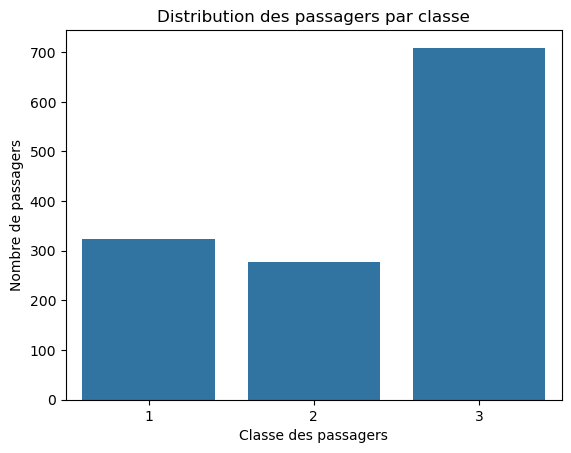

In [129]:
#13 distribution des passagers selon leurs classes
sns.countplot(x=titanic["pclass"])
plt.xlabel("Classe des passagers")
plt.ylabel("Nombre de passagers")
plt.title("Distribution des passagers par classe")
plt.show()

*La majorité des passagers etaient en 3ème classe. Et le moins de passagers sont en 1ère classe.*

C:\Users\leila\AppData\Local\Temp\ipykernel_11740\1285799204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=titanic["pclass"], y=titanic["fare"], palette="muted")


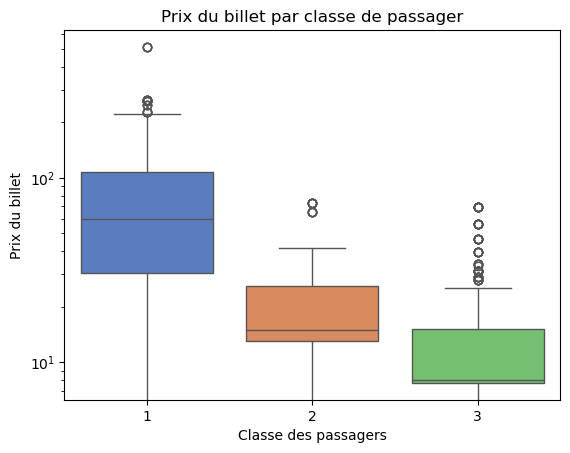

In [150]:
#14 relation entre prix du billet et classe des passagers
sns.boxplot(x=titanic["pclass"], y=titanic["fare"], palette="muted")
plt.xlabel("Classe des passagers")
plt.ylabel("Prix du billet")
plt.title("Prix du billet par classe de passager")
plt.yscale("log")  # Mettre l'échelle logarithmique pour mieux visualiser
plt.show()

*1ere classe → Billets chers avec une grande variation.
2eme classe → Billets moins chers mais assez élevés.
3eme classe → Billets les moins chers, souvent inférieurs à 20€.*

*fin du tp 3 - theorie et traitement de l'information*